In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("AirPassengers.csv")

In [4]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
#converting the data to datetime  object
data["Month"] = pd.to_datetime(data["Month"])

In [6]:
data

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [8]:
#changing the column to index
data = data.set_index(["Month"])

In [9]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [10]:
data.shape

(144, 1)

<Axes: xlabel='Month'>

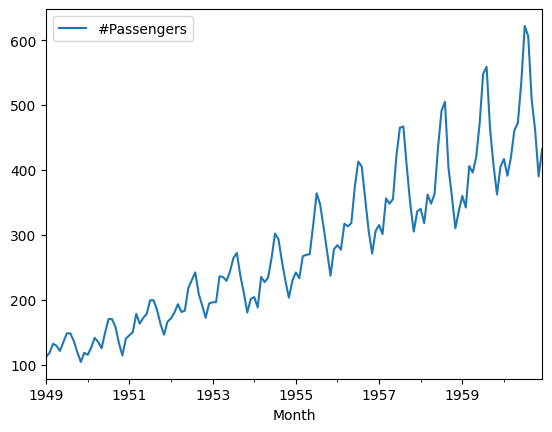

In [11]:
# Plotting the Time Series

data.plot()

In [12]:
#lets check if the data is stationary data or not

In [13]:
# to find the stationarity in data, we will use a statistical test i.e. adfuller test
# Augmented Dickey Fuller test

In [15]:
# here we will take two hypothesis

# 1) null hypothesis
# 2) Alternate Hypothesis

In [16]:
# To reject the null hypotheses, the following
# must be true:

# 1. If the p-value after the adfuller test is
# greater than 0.05, we fail to reject the
# hypotheses.

# 2. If the p-value is less than 0.05, we can
# reject the null hypotheses and assume
# that the time series is stationary.m


# h0- data is not stationary
# h1 - data is stationary

In [17]:
from statsmodels.tsa.stattools import adfuller

In [19]:
result = adfuller(data["#Passengers"])
print(result)

if(result[1]>0.05):
  print("The data is not stationary")

else:
  print("The data is stationary")

(0.8153688792060498, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
The data is not stationary


In [20]:
#seasonal decompose : It plots the components of the time series data

from statsmodels.tsa.seasonal import seasonal_decompose

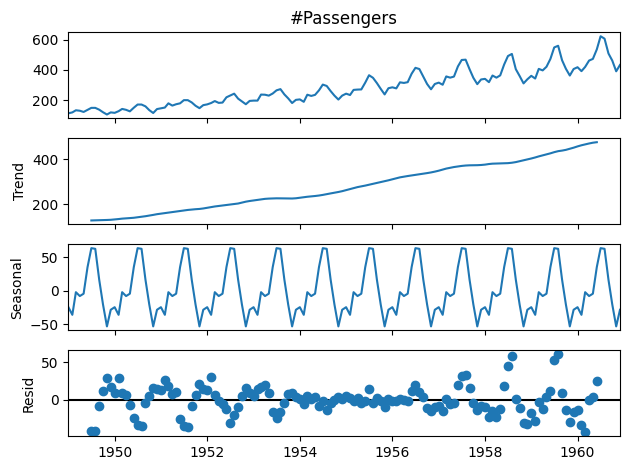

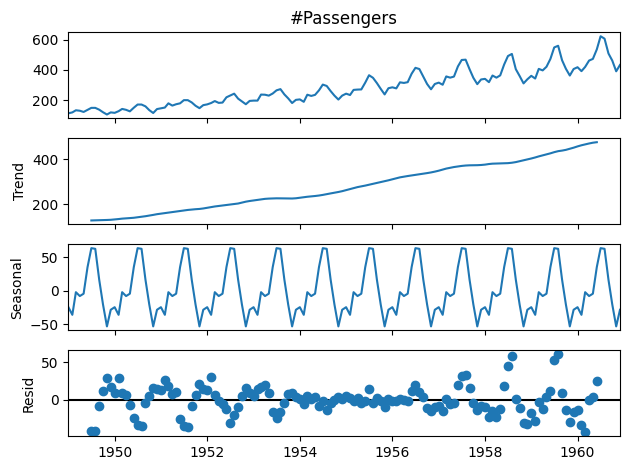

In [21]:
decomposition = seasonal_decompose(data["#Passengers"])
decomposition.plot()

ROLLING STATISTICS:

Rolling statistics is a very useful operation for time series data. Rolling mean creats a rolling window with a specified size and perform calculation on the data in this window which ofcourse rolls through the data.

Rolling stats also helps us to plot the mean and the standard deviation

In [22]:
mean_log = data.rolling(window=12).mean()
std_log = data.rolling(window=12).std()

<function matplotlib.pyplot.show(close=None, block=None)>

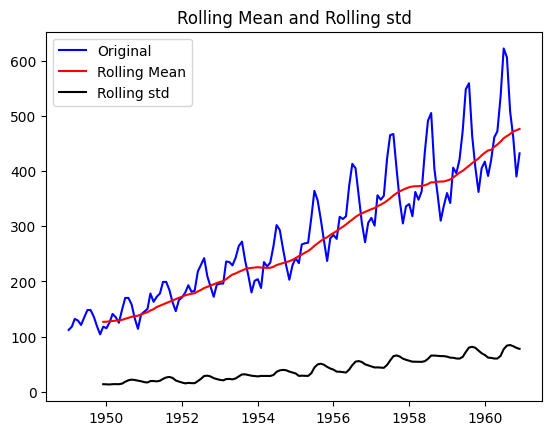

In [23]:
plt.plot(data, color="blue",label="Original")
plt.plot(mean_log,color="red",label="Rolling Mean")
plt.plot(std_log,color="black",label="Rolling std")
plt.legend(loc="best")
plt.title("Rolling Mean and Rolling std")
plt.show

In [24]:
#transformation

first_log = np.log(data)
first_log = first_log.dropna()

In [25]:
mean_log = first_log.rolling(window=12).mean()
std_log = first_log.rolling(window=12).std()

<function matplotlib.pyplot.show(close=None, block=None)>

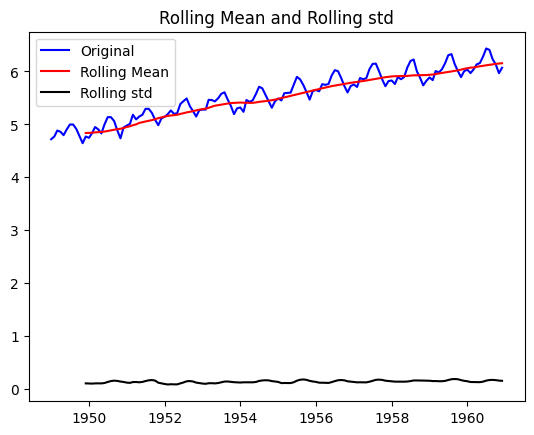

In [27]:
plt.plot(first_log, color="blue",label="Original")
plt.plot(mean_log,color="red",label="Rolling Mean")
plt.plot(std_log,color="black",label="Rolling std")
plt.legend(loc="best")
plt.title("Rolling Mean and Rolling std")
plt.show

In [29]:
new_data = first_log - mean_log
new_data = new_data.dropna()

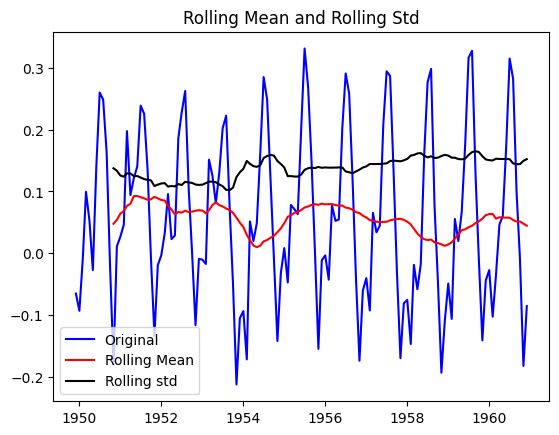

In [30]:
mean_log = new_data.rolling(window=12).mean()
std_log = new_data.rolling(window=12).std()

plt.plot(new_data,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [32]:
from statsmodels.tsa.stattools import adfuller

In [36]:
result = adfuller(new_data)
result


if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("series is stationary")

series is stationary


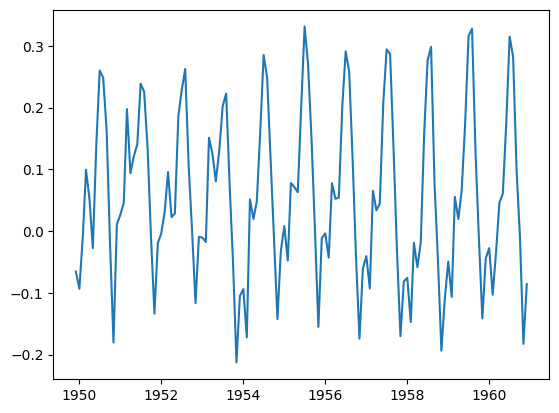

In [37]:
plt.plot(new_data)
plt.show()

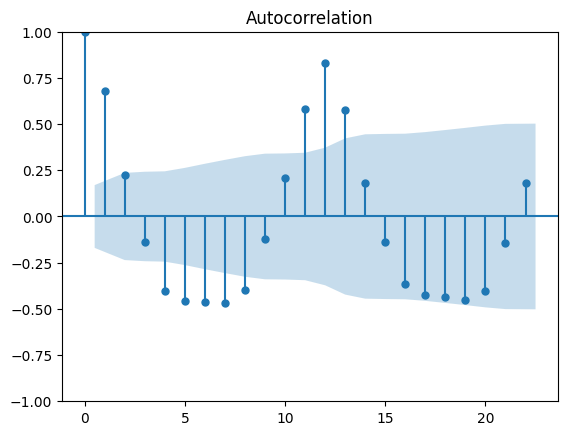

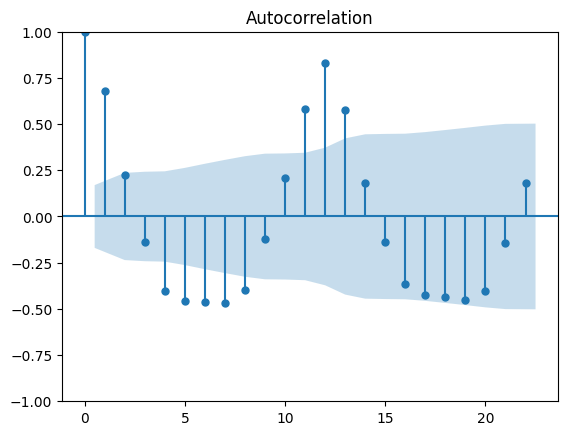

In [38]:
# Autocorrelation

from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(new_data.dropna()) #=--------> value of q

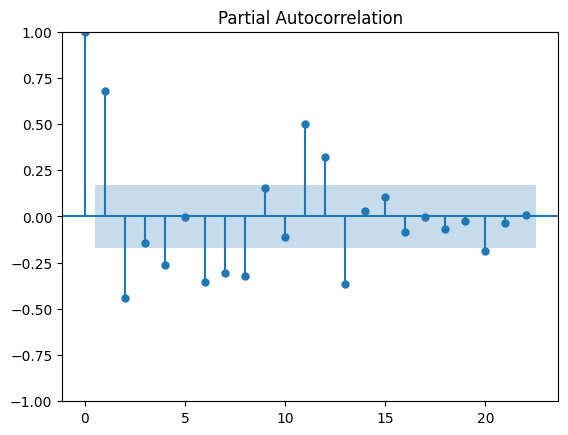

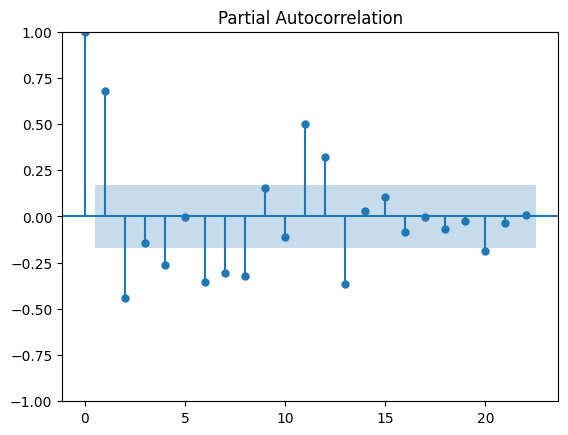

In [40]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(new_data.dropna())  #---------> value of p

In [41]:
train = new_data.iloc[:120]
test = new_data[121:]

In [42]:
train

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1959-07-01,0.316430
1959-08-01,0.327838
1959-09-01,0.128057


In [43]:
test

,#Passengers
Month,
1960-01-01,-0.027530
1960-02-01,-0.103067
1960-03-01,-0.036530
1960-04-01,0.046332
1960-05-01,0.060186
1960-06-01,0.175033
1960-07-01,0.315151
1960-08-01,0.282363
1960-09-01,0.098235


In [46]:
len(train)

120

In [47]:
len(test)

12

In [44]:
from statsmodels.tsa.arima.model import ARIMA

In [45]:
model = ARIMA(train,order=(2,1,2))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

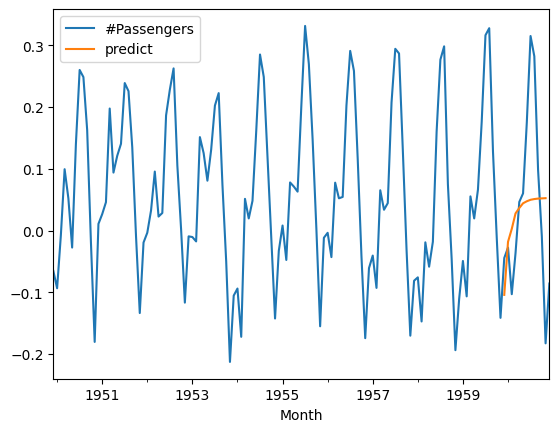

In [48]:
new_data['predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
new_data[['#Passengers','predict']].plot()

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [50]:
model=SARIMAX(train,order=(2,1,2),seasonal_order=(2,1,2,12))
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

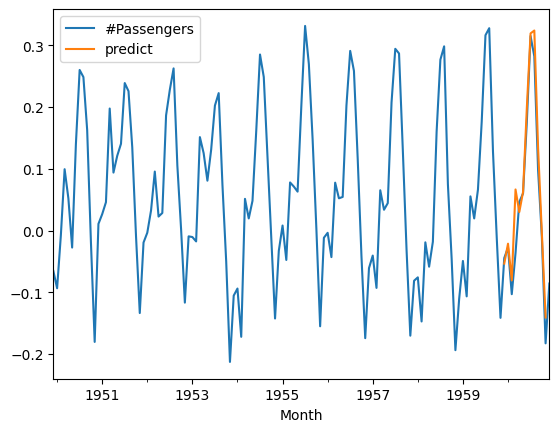

In [51]:
new_data['predict']=model.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)
new_data[['#Passengers','predict']].plot()

<Axes: xlabel='Month'>

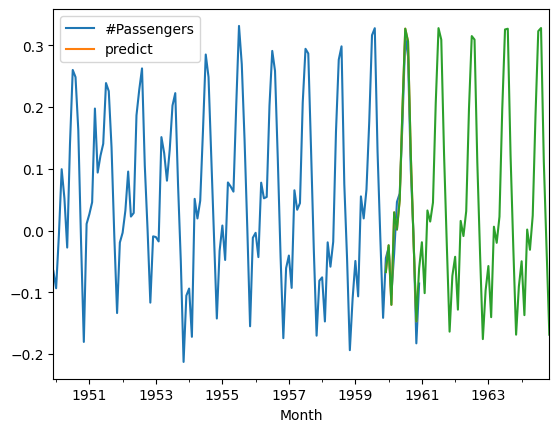

In [52]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination)) #total combinations of p,d,q

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        #model = ARIMA(train, order=pdq).fit()
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

results

128


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

,RMSE
"(0, 0, 0)",0.146302
"(0, 0, 1)",0.144681
"(0, 0, 2)",0.143463
"(0, 0, 3)",0.139312
"(0, 0, 4)",0.142847
...,...
"(7, 1, 3)",0.096213
"(7, 1, 4)",0.129938
"(7, 1, 5)",0.099939
"(7, 1, 6)",0.112544


In [53]:
results.sort_values("RMSE") #Least RMSE score are best hyperparamterer for (p,d,q) values

,RMSE
"(5, 1, 7)",0.084174
"(6, 0, 0)",0.087669
"(6, 1, 1)",0.087859
"(4, 0, 6)",0.088317
"(7, 1, 2)",0.089486
...,...
"(2, 1, 0)",0.225544
"(0, 1, 0)",0.236146
"(1, 1, 1)",0.247916
"(0, 1, 1)",0.260413


In [54]:
c

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

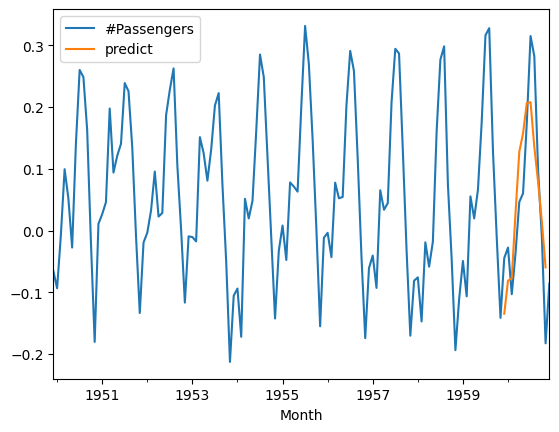

In [55]:
new_data[['#Passengers','predict']].plot()

In [56]:
model=SARIMAX(train,order=(5,1,7),seasonal_order=(5,1,7,12))
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

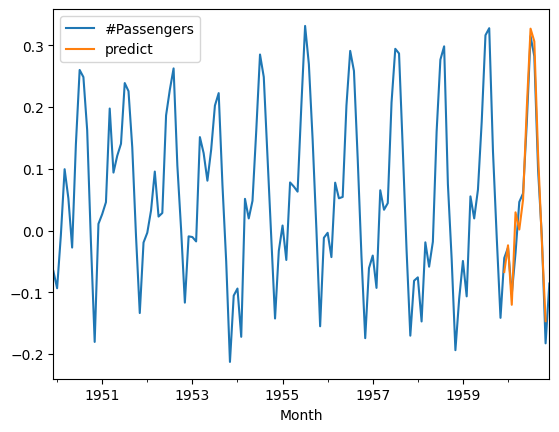

In [57]:
new_data['predict']=model.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)
new_data[['#Passengers','predict']].plot()

<Axes: xlabel='Month'>

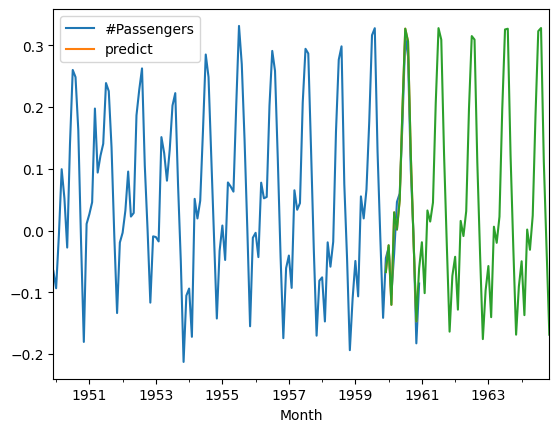

In [59]:
# forecasting for next 5 years
forecast = model.forecast(steps = 60)
new_data.plot()
forecast.plot()

<Axes: xlabel='Month'>

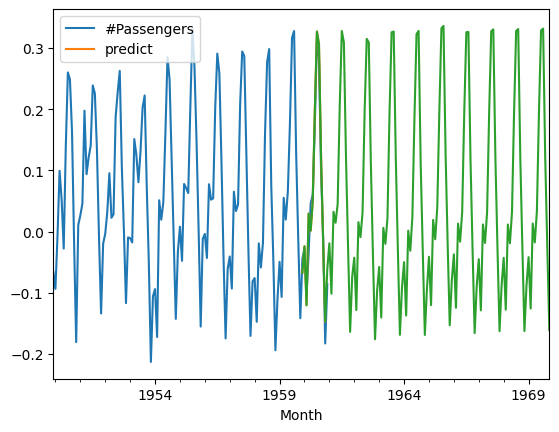

In [60]:
# forecasting for next 10 years
forecast = model.forecast(steps = 120)
new_data.plot()
forecast.plot()